I need to change the colors and font sizes. Add labels to everything. Change zorder

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
%matplotlib inline
#plt.style.use('seaborn')

In [4]:
%load_ext autoreload
%autoreload 2

In [5]:
with open('data/cs_df_M.pkl', 'rb') as f:
    df = pickle.load(f)

In [282]:
df_awp = df[df.item_name == 'AWP | Phobos (Factory New)']
df_m4 = df[df.item_name == 'M4A1-S | Mecha Industries (Field-Tested)']
df_p2k = df[df.item_name == 'P2000 | Imperial Dragon (Field-Tested)']

In [283]:
df_awp = df_awp.reset_index(drop=True)
df_m4 = df_m4.reset_index(drop=True)
df_p2k = df_p2k.reset_index(drop=True)

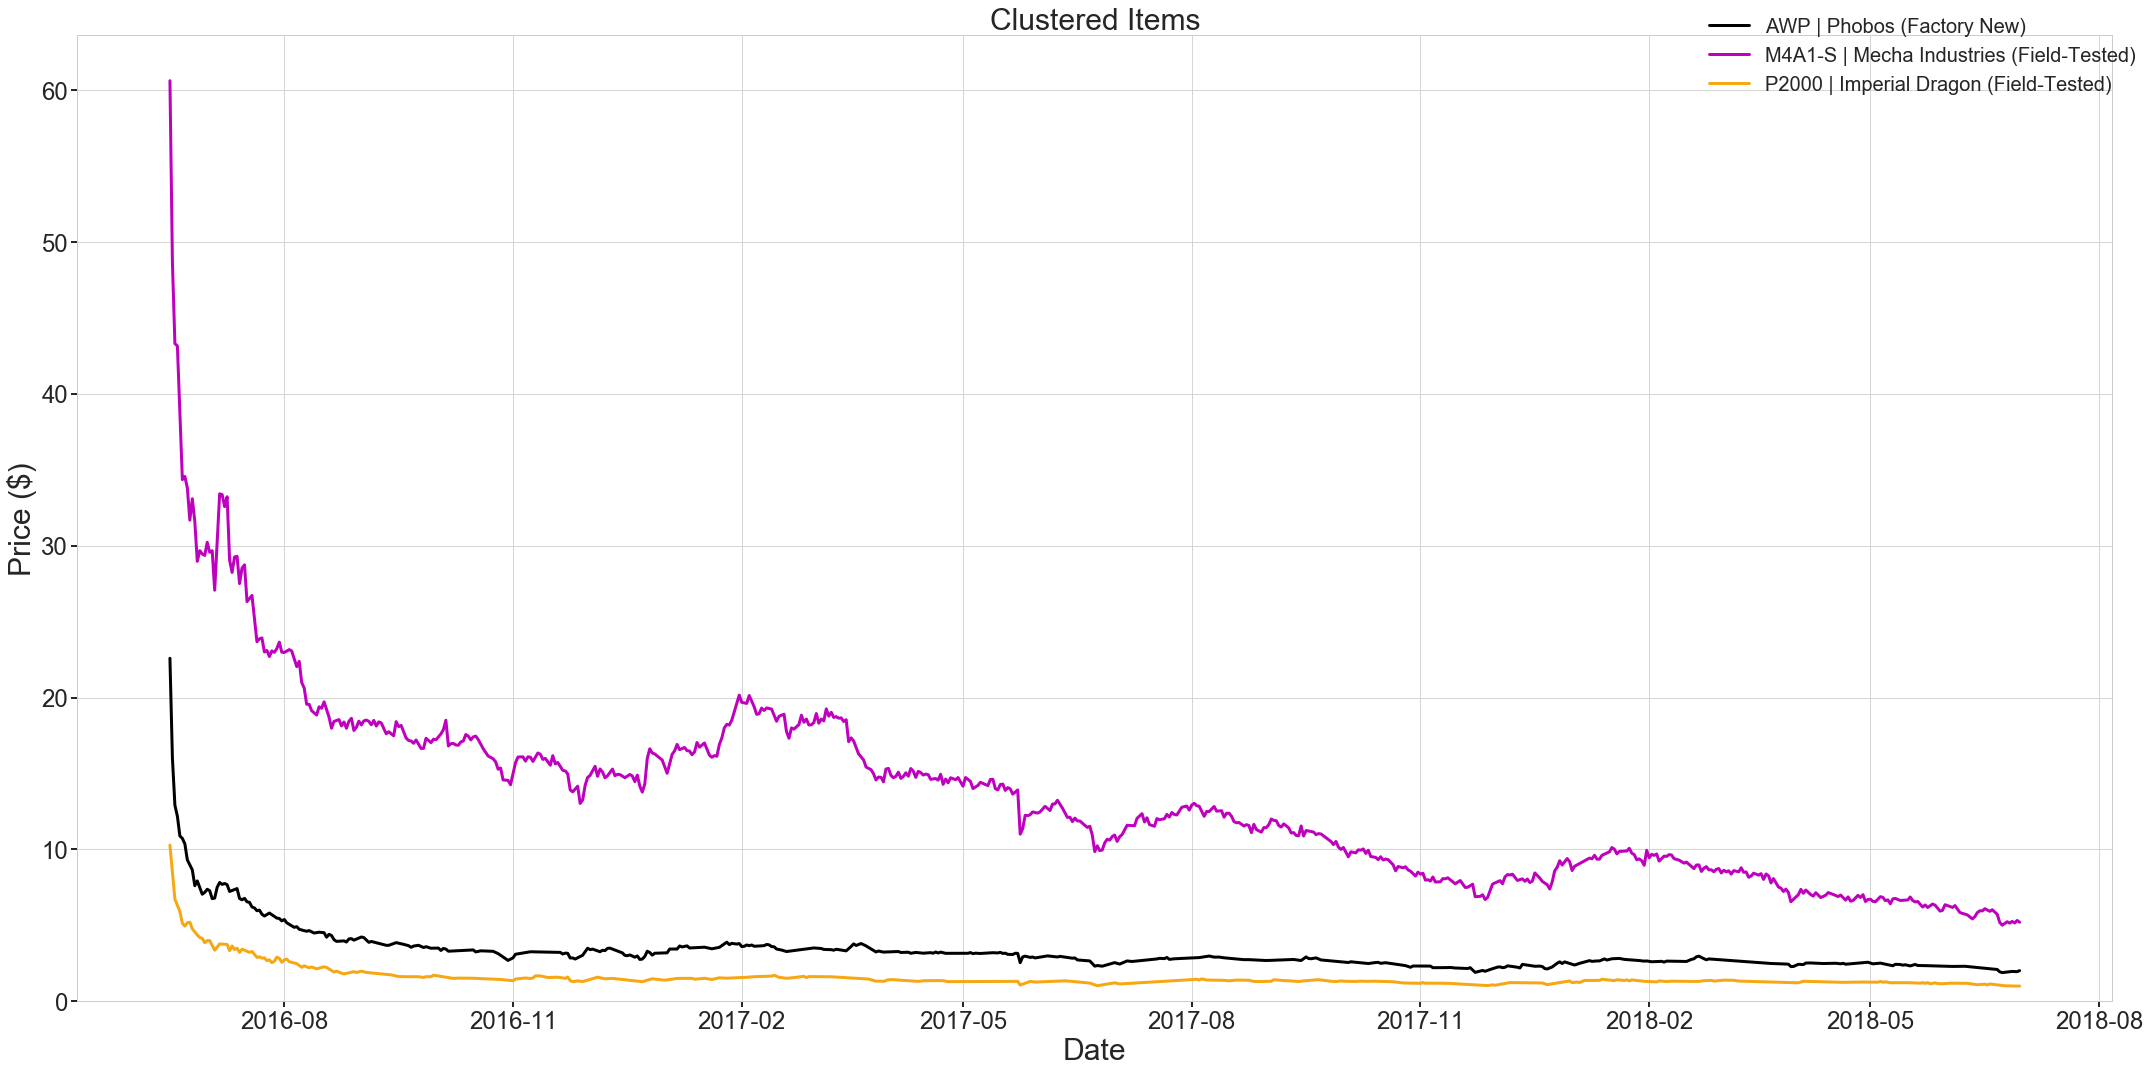

In [324]:
fig, ax = plt.subplots(figsize=(30, 15))
ax.plot(df_awp.timestamp, df_awp.median_sell_price, label='AWP | Phobos (Factory New)', c='black', linewidth=3)
ax.plot(df_m4.timestamp, df_m4.median_sell_price, label='M4A1-S | Mecha Industries (Field-Tested)', c='m', linewidth=3)
ax.plot(df_p2k.timestamp, df_p2k.median_sell_price, label='P2000 | Imperial Dragon (Field-Tested)', c='#F7A712', linewidth=3)
fig.legend(fontsize=20)
ax.set_title('Clustered Items', fontsize=30)
ax.set_xlabel('Date', fontsize=30)
ax.set_ylabel('Price ($)', fontsize=30)
ax.set_ylim(bottom=0)
ax.tick_params(direction='out', length=6, width=2, labelsize=24)
plt.tight_layout()

In [245]:
def standardscale(series):
    mean = np.mean(series)
    std = np.std(series)
    return (series-mean)/std

In [231]:
awp_scaled = standardscale(df_awp.median_sell_price[40:])
m4_scaled = standardscale(df_m4.median_sell_price[40:])
p2k_scaled = standardscale(df_p2k.median_sell_price[40:])

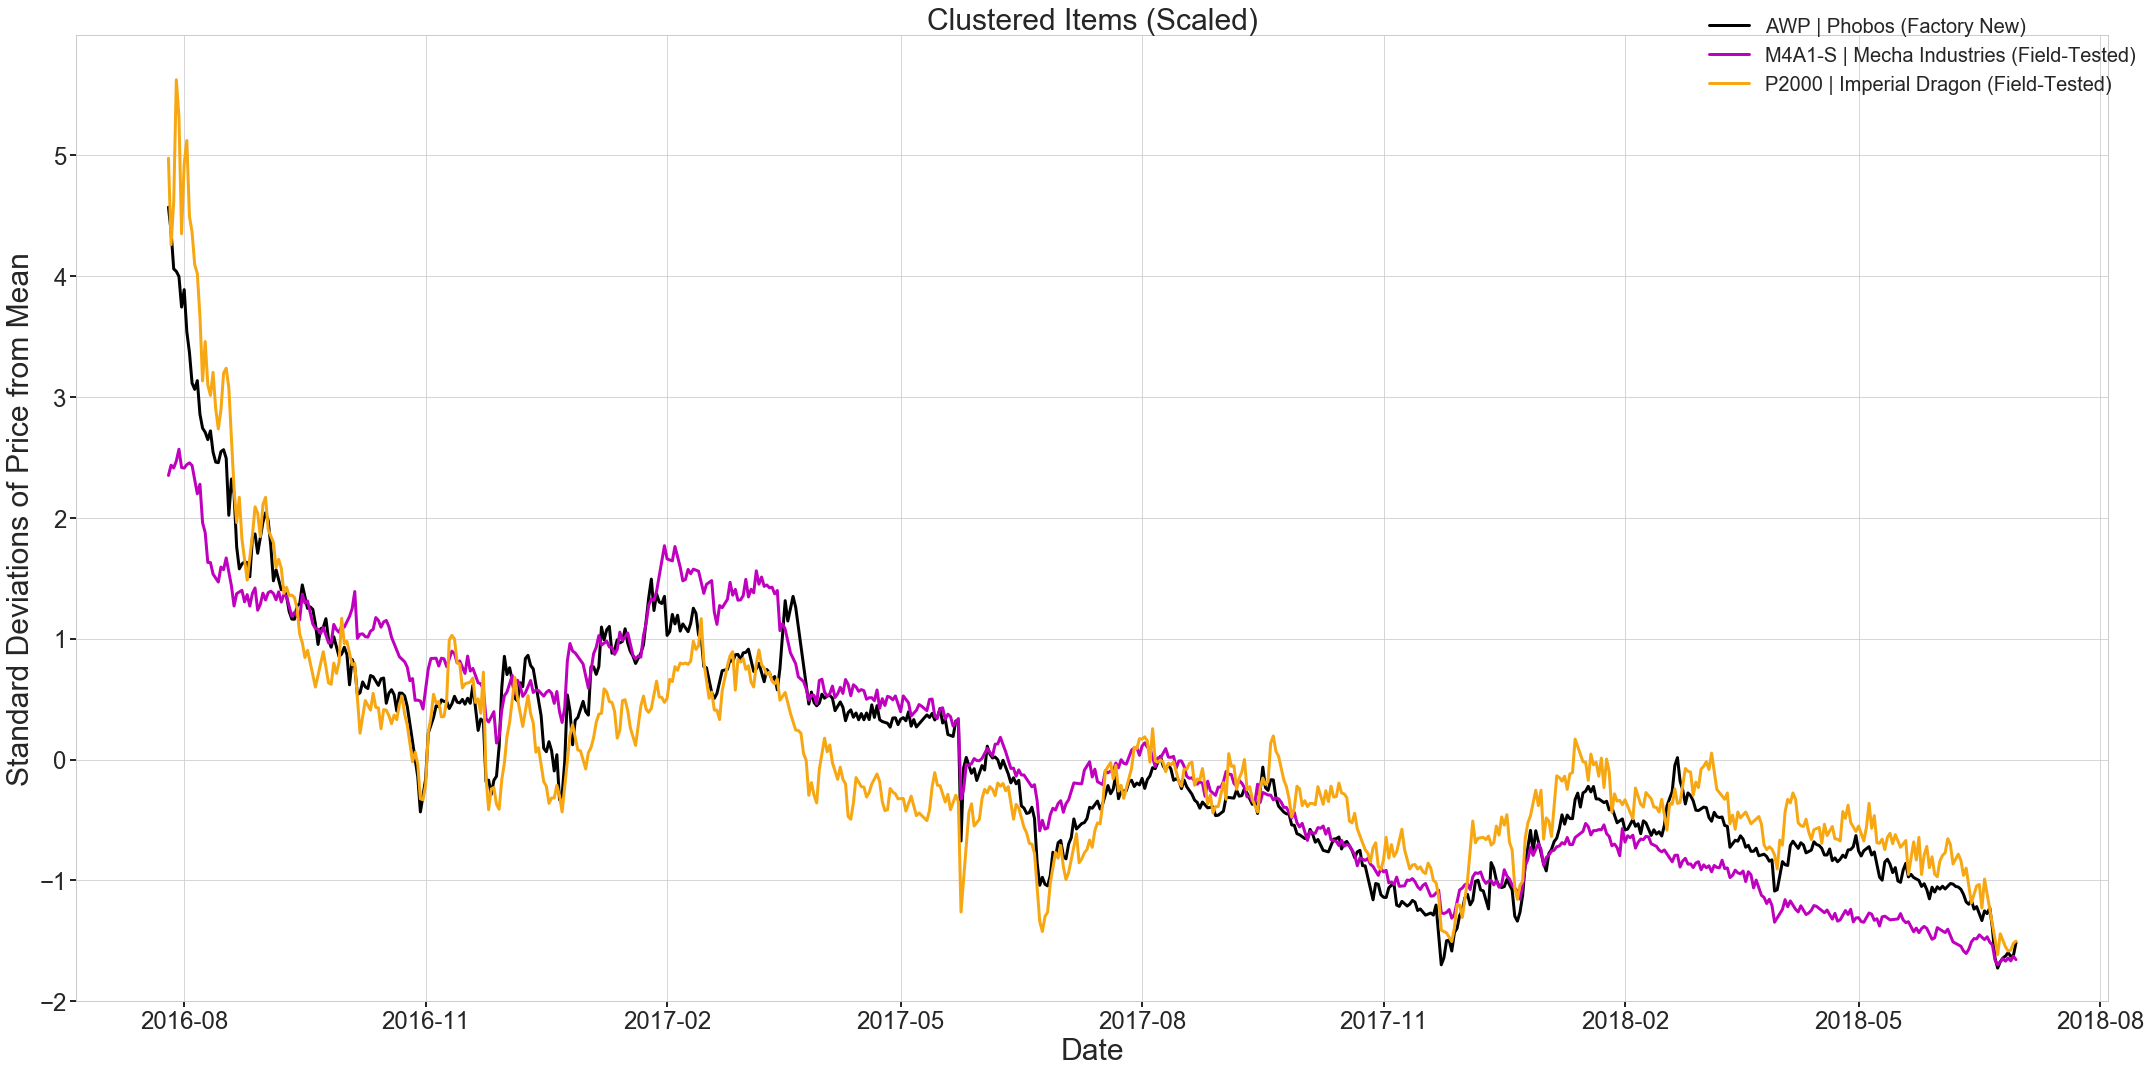

In [318]:
fig, ax = plt.subplots(figsize=(30, 15))
ax.plot(df_awp.timestamp[40:], awp_scaled, label='AWP | Phobos (Factory New)', linewidth=3, c='black')
ax.plot(df_m4.timestamp[40:], m4_scaled, label='M4A1-S | Mecha Industries (Field-Tested)', linewidth=3, c='m')
ax.plot(df_p2k.timestamp[40:], p2k_scaled, label='P2000 | Imperial Dragon (Field-Tested)', linewidth=3, c='#F7A712')
fig.legend(loc='upper right', fontsize=20)
ax.set_title('Clustered Items (Scaled)', fontsize=30)
ax.set_ylim(bottom=-2)
ax.set_xlabel('Date', fontsize=30)
ax.set_ylabel('Standard Deviations of Price from Mean', fontsize=30)
ax.tick_params(direction='out', length=6, width=2, labelsize=24)
plt.tight_layout()

## Trying 3 completely different items

In [ ]:
AWP | Elite Build (Minimal Wear)
M249 | Spectre (Factory New)
StatTrak™ MP7 | Urban Hazard (Field-Tested)

In [243]:
df_awp2 = df[df.item_name == 'AWP | Elite Build (Minimal Wear)'].reset_index(drop=True)
df_m249 = df[df.item_name == 'M249 | Spectre (Factory New)'].reset_index(drop=True)
df_mp7 = df[df.item_name == 'StatTrak™ MP7 | Urban Hazard (Field-Tested)'].reset_index(drop=True)

Text(0,0.5,'Price')

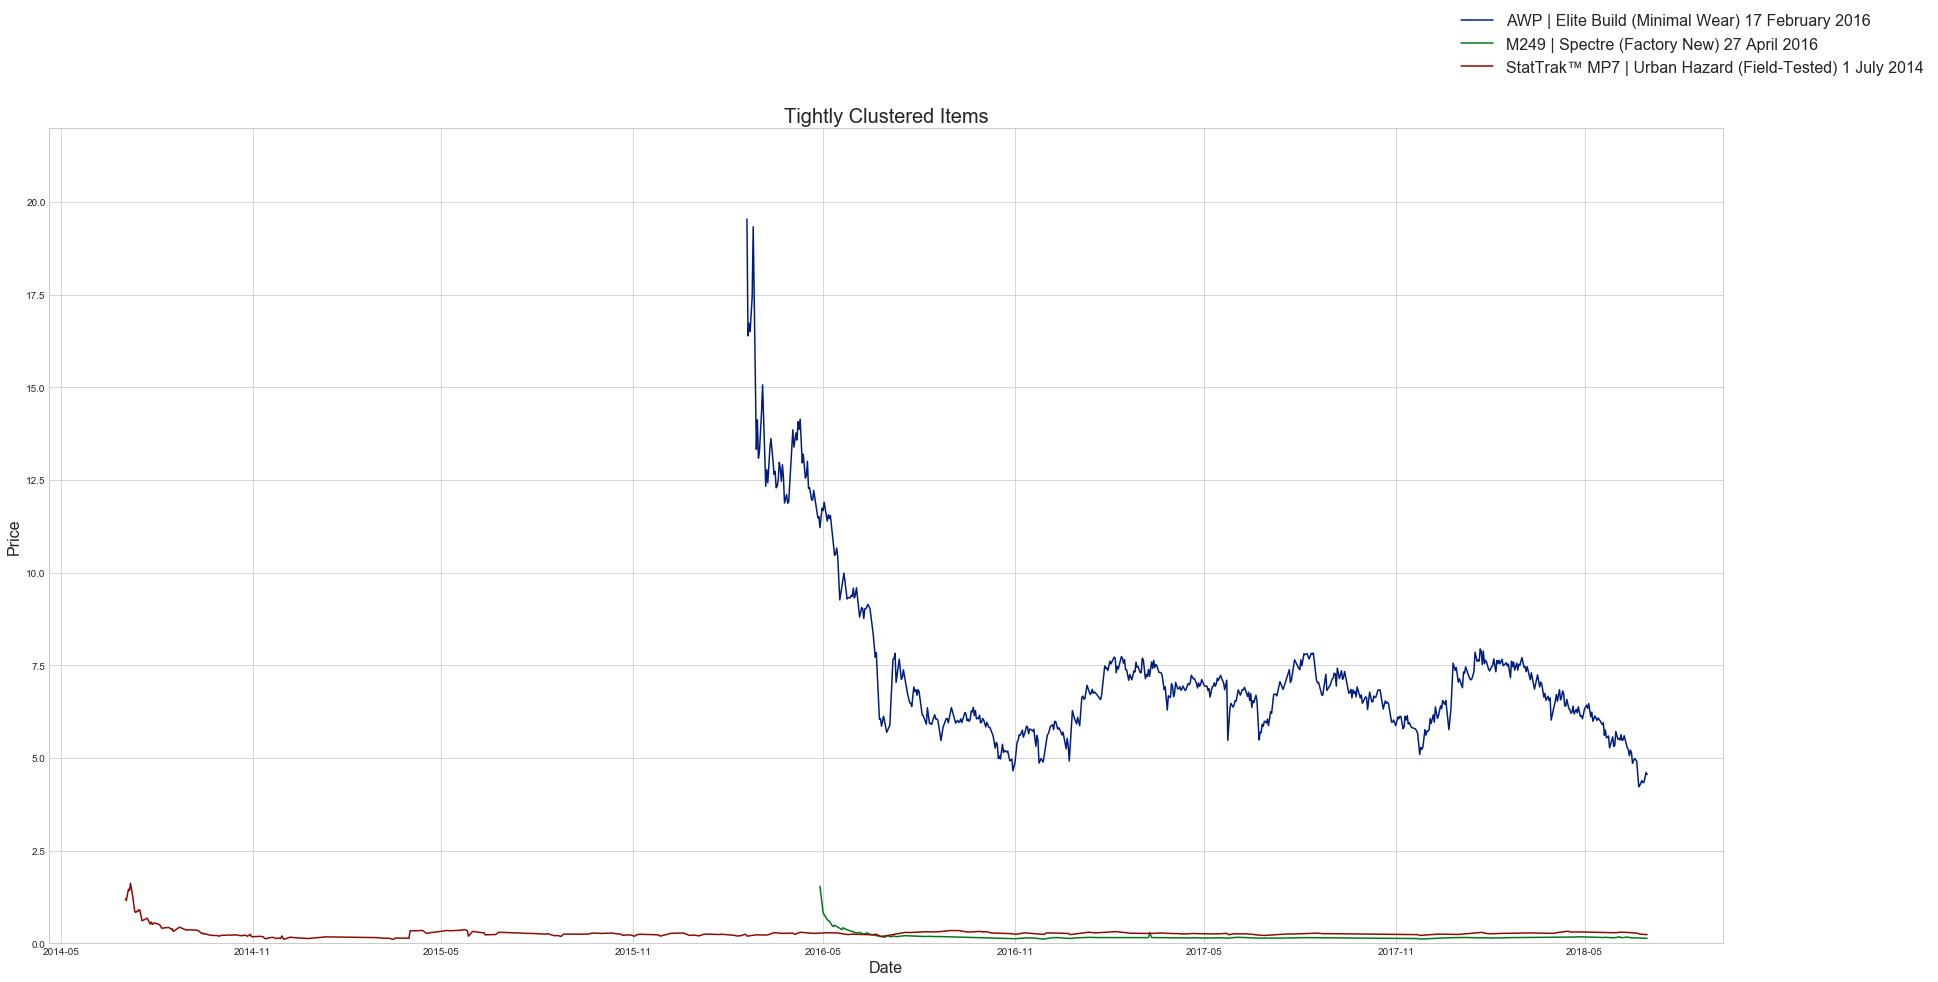

In [244]:
fig, ax = plt.subplots(figsize=(30, 15))
ax.plot(df_awp2.timestamp, df_awp2.median_sell_price, label='AWP | Elite Build (Minimal Wear) 17 February 2016')
ax.plot(df_m249.timestamp, df_m249.median_sell_price, label='M249 | Spectre (Factory New) 27 April 2016')
ax.plot(df_mp7.timestamp, df_mp7.median_sell_price, label='StatTrak™ MP7 | Urban Hazard (Field-Tested) 1 July 2014')
fig.legend(fontsize=16)
ax.set_ylim([0,22])
ax.set_title('Tightly Clustered Items', fontsize=20)
ax.set_xlabel('Date', fontsize=16)
ax.set_ylabel('Price', fontsize=16)

In [276]:
rmv_days = 60
awp2_scaled = standardscale(df_awp2.median_sell_price[rmv_days:])
m249_scaled = standardscale(df_m249.median_sell_price[rmv_days:])
mp7_scaled = standardscale(df_mp7.median_sell_price[rmv_days:])

Text(0,0.5,'Price')

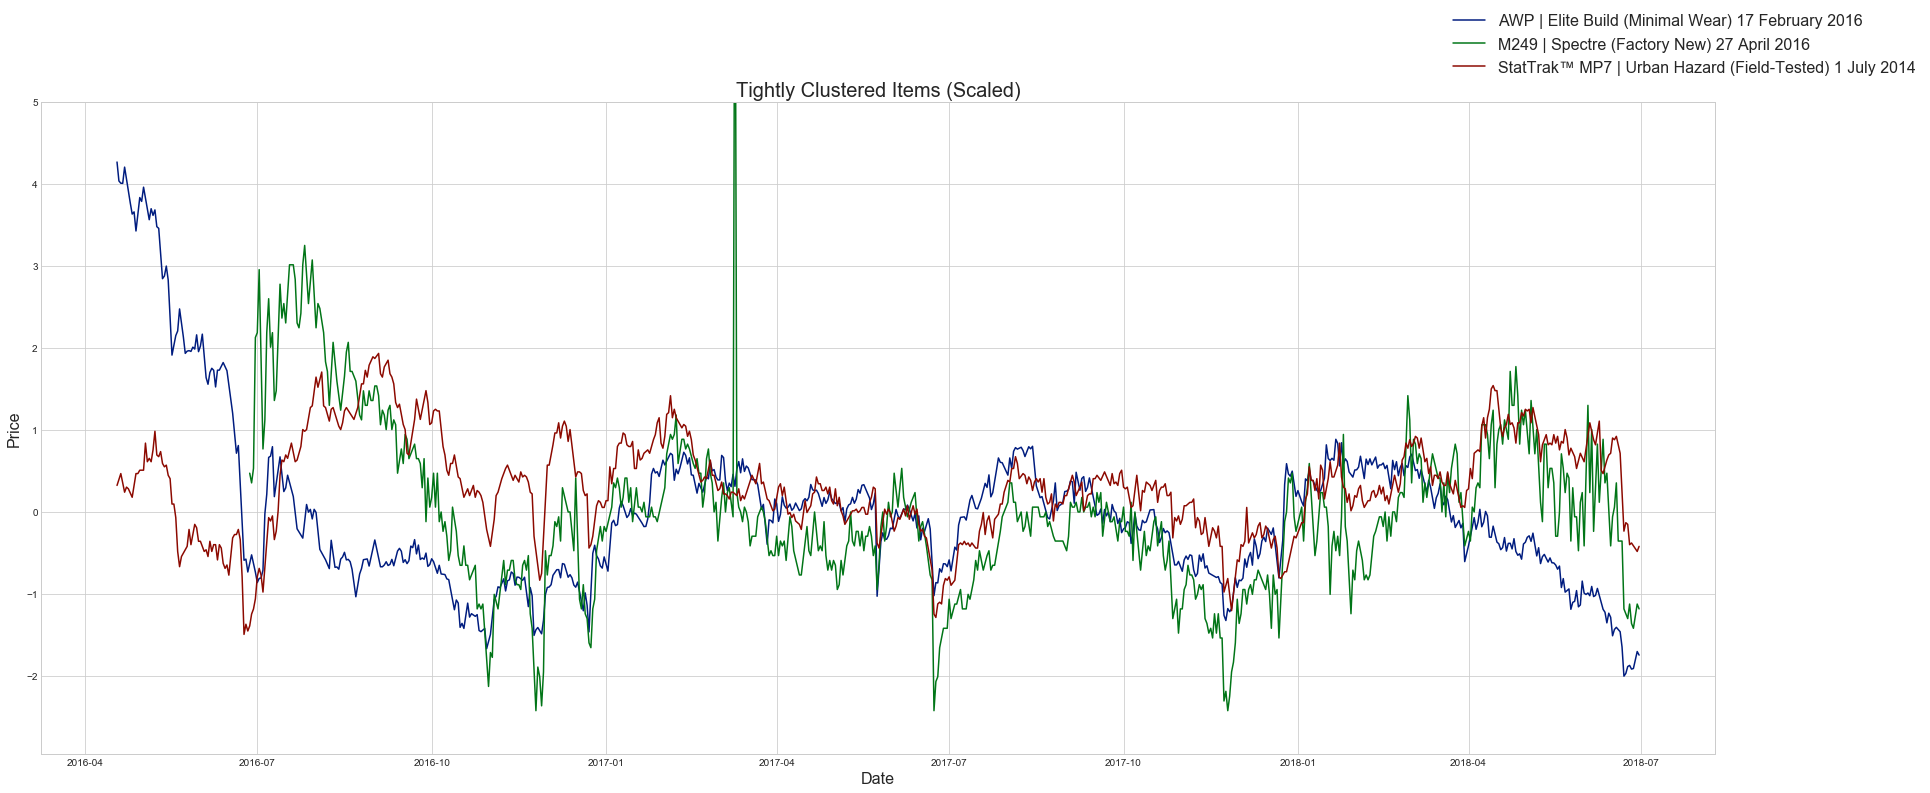

In [281]:
fig, ax = plt.subplots(figsize=(30, 12))
ax.plot(df_awp2.timestamp[rmv_days:], awp2_scaled, label='AWP | Elite Build (Minimal Wear) 17 February 2016')
ax.plot(df_m249.timestamp[rmv_days:], m249_scaled, label='M249 | Spectre (Factory New) 27 April 2016')
ax.plot(df_awp2.timestamp[rmv_days:], mp7_scaled[-len(awp2_scaled):], label='StatTrak™ MP7 | Urban Hazard (Field-Tested) 1 July 2014')
fig.legend(fontsize=16, loc='upper right')
ax.set_ylim(top=5)
ax.set_xlim(left=df_awp2.timestamp[20])
ax.set_title('Tightly Clustered Items (Scaled)', fontsize=20)
ax.set_xlabel('Date', fontsize=16)
ax.set_ylabel('Price', fontsize=16)

---

### Graph anomalies on top of random plots until you find a good one

  * Import anomalies
  * filter df by mins
  * filter df by release date < earlier anomaly
  * plot 10 random ones

In [4]:
with open('anomalies.pkl', 'rb') as f:
    anomalies = pickle.load(f)

In [5]:
from dendrogram_class import mask_mins
from twitter_on_arima import filter_data, scale_anomalies
import twitter_on_arima as toa

In [57]:
df_filter = filter_data(df)

In [10]:
anomalies = toa.scale_anomalies(anomalies)

In [12]:
# I have scaled anomalies ^

In [13]:
anomalies[:30]

[(Timestamp('2017-05-25 00:00:00'), 0.02774221084080239),
 (Timestamp('2015-11-28 00:00:00'), 0.026347511623902187),
 (Timestamp('2015-11-29 00:00:00'), 0.024108834165662132),
 (Timestamp('2015-11-27 00:00:00'), 0.022903392457379025),
 (Timestamp('2015-11-30 00:00:00'), 0.02273118649905287),
 (Timestamp('2015-12-01 00:00:00'), 0.022042362665748234),
 (Timestamp('2016-11-27 00:00:00'), 0.02114368092263335),
 (Timestamp('2016-11-28 00:00:00'), 0.02114368092263335),
 (Timestamp('2016-11-29 00:00:00'), 0.020623388797750174),
 (Timestamp('2016-11-26 00:00:00'), 0.02054794520547945),
 (Timestamp('2018-06-29 00:00:00'), 0.02044989775051125),
 (Timestamp('2017-05-26 00:00:00'), 0.020164301717699777),
 (Timestamp('2016-11-30 00:00:00'), 0.019163355924281374),
 (Timestamp('2018-06-28 00:00:00'), 0.018869678378880834),
 (Timestamp('2017-11-25 00:00:00'), 0.018594833651623278),
 (Timestamp('2018-06-27 00:00:00'), 0.018126045733407696),
 (Timestamp('2018-06-30 00:00:00'), 0.01784718349135527),
 (Ti

In [20]:
pd.to_datetime(temp_df.index[0])

Timestamp('2016-07-17 00:00:00')

In [26]:
min(anomalies[:30])[0]

Timestamp('2015-11-27 00:00:00')

In [27]:
df_filter.head()

,item_name,date_str,median_sell_price,quantity,est_release_str,days_since_release,gun_type,skin,quality,gun_bool,StatTrak,souvenir,keys,capsules,stickers,date,est_release,timestamp,min_quant,min_price
31,Glock-18 | Weasel (Battle-Scarred),19 Sep 2016,1.970,139,19 Aug 2016,31,Glock-18,Weasel,Battle-Scarred,True,False,False,False,False,False,1.474261e+09,1.471583e+09,2016-09-19,57,0.335
32,Glock-18 | Weasel (Battle-Scarred),20 Sep 2016,1.927,128,19 Aug 2016,32,Glock-18,Weasel,Battle-Scarred,True,False,False,False,False,False,1.474348e+09,1.471583e+09,2016-09-20,57,0.335
33,Glock-18 | Weasel (Battle-Scarred),21 Sep 2016,1.909,119,19 Aug 2016,33,Glock-18,Weasel,Battle-Scarred,True,False,False,False,False,False,1.474434e+09,1.471583e+09,2016-09-21,57,0.335
34,Glock-18 | Weasel (Battle-Scarred),22 Sep 2016,1.856,142,19 Aug 2016,34,Glock-18,Weasel,Battle-Scarred,True,False,False,False,False,False,1.474520e+09,1.471583e+09,2016-09-22,57,0.335
35,Glock-18 | Weasel (Battle-Scarred),23 Sep 2016,1.830,156,19 Aug 2016,35,Glock-18,Weasel,Battle-Scarred,True,False,False,False,False,False,1.474607e+09,1.471583e+09,2016-09-23,57,0.335


In [28]:
from date_util import epoch_to_Timestamp

In [108]:
df_filter = df_filter[[epoch_to_Timestamp(t) <= min(anomalies[:200])[0] for t in df_filter['est_release']]]

/Applications/anaconda3/envs/capstone_env/lib/python3.6/site-packages/ipykernel_launcher.py:10: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  # Remove the CWD from sys.path while we load stuff.


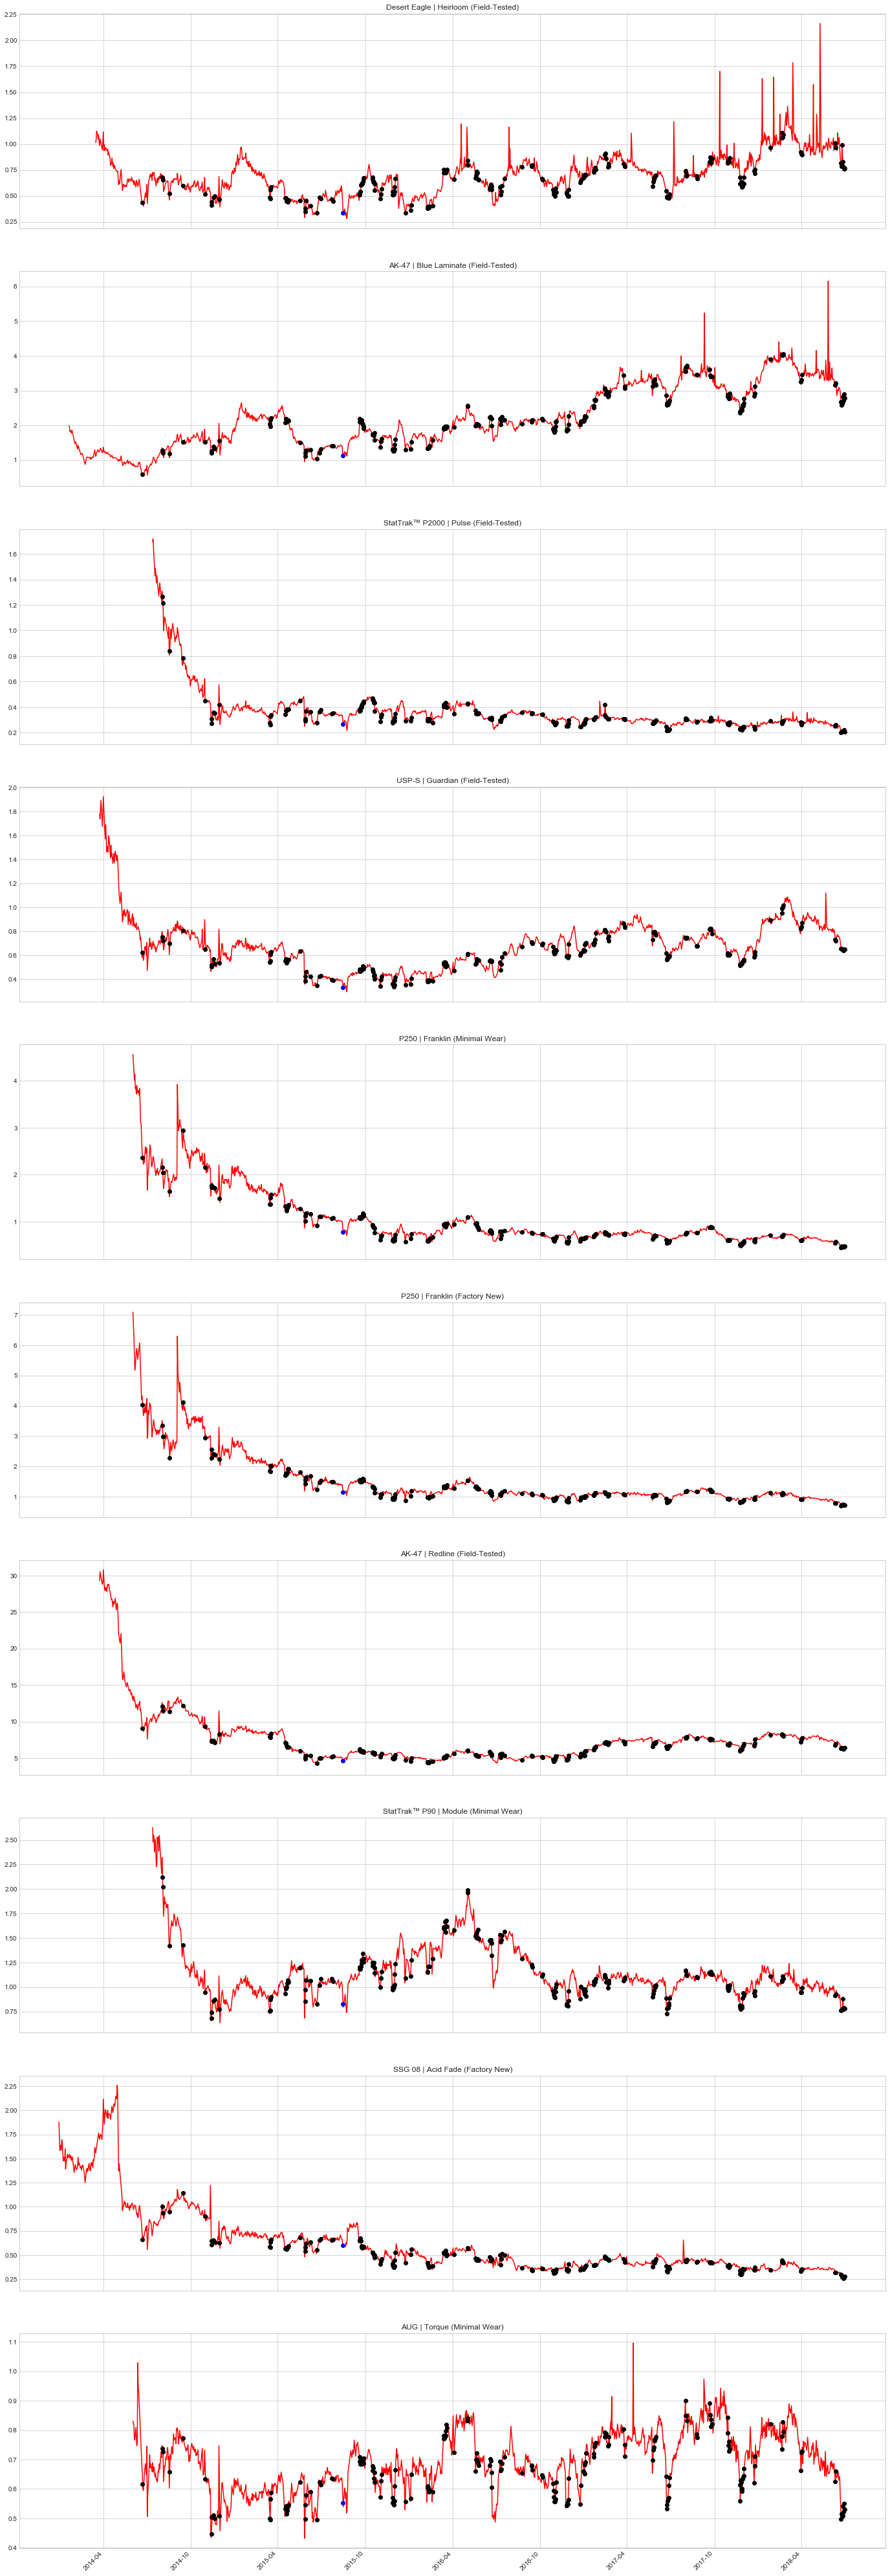

In [326]:
n_timeseries = 10
fig, ax = plt.subplots(n_timeseries, 1, figsize=(24, 8*n_timeseries), sharex=True)
fig.autofmt_xdate(rotation=45)
for i, gun in enumerate(np.random.choice(df_filter.item_name.unique(), n_timeseries, replace=False)):
    temp_df = df_filter[df_filter.item_name == gun]
    temp_df = temp_df[['timestamp', 'median_sell_price']].reset_index(drop=True)
    temp_df.index = temp_df['timestamp']
    ax[i].plot([pd.to_datetime(t) for t in list(temp_df.index)], temp_df['median_sell_price'], 'red', zorder=1)
    ax[i].scatter(pd.datetime(2015,8,15), temp_df.loc[pd.datetime(2015,8,15),'median_sell_price'], c='blue', zorder=2)
    ax[i].scatter([x[0] for x in anomalies[:200]], temp_df.loc[[x[0] for x in anomalies[:200]]]['median_sell_price'].values, c='black', zorder=2)

    ax[i].set_title(gun)

In [23]:
anom_val = df[df.item_name=='AWP | Redline (Field-Tested)']

In [24]:
from pyculiarity import detect_ts
from pyramid.arima import auto_arima

In [25]:
df_val = anom_val[['timestamp', 'median_sell_price']]
model = auto_arima(df_val['median_sell_price'][30:])
df_detect = pd.DataFrame({'timestamp': df_val['timestamp'][31:].values, 'value':model.predict_in_sample(start=1)})
results = detect_ts(df_detect, max_anoms=0.3, alpha=0.001, direction='both', only_last=None,
                     longterm=True, verbose=True, piecewise_median_period_weeks=3)

/Applications/anaconda3/envs/capstone_env/lib/python3.6/site-packages/statsmodels/tsa/statespace/representation.py:375: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return matrix[[slice(None)]*(matrix.ndim-1) + [0]]


Text(0.5,1,'AWP | Redline (Field-Tested) Anomaly Detection')

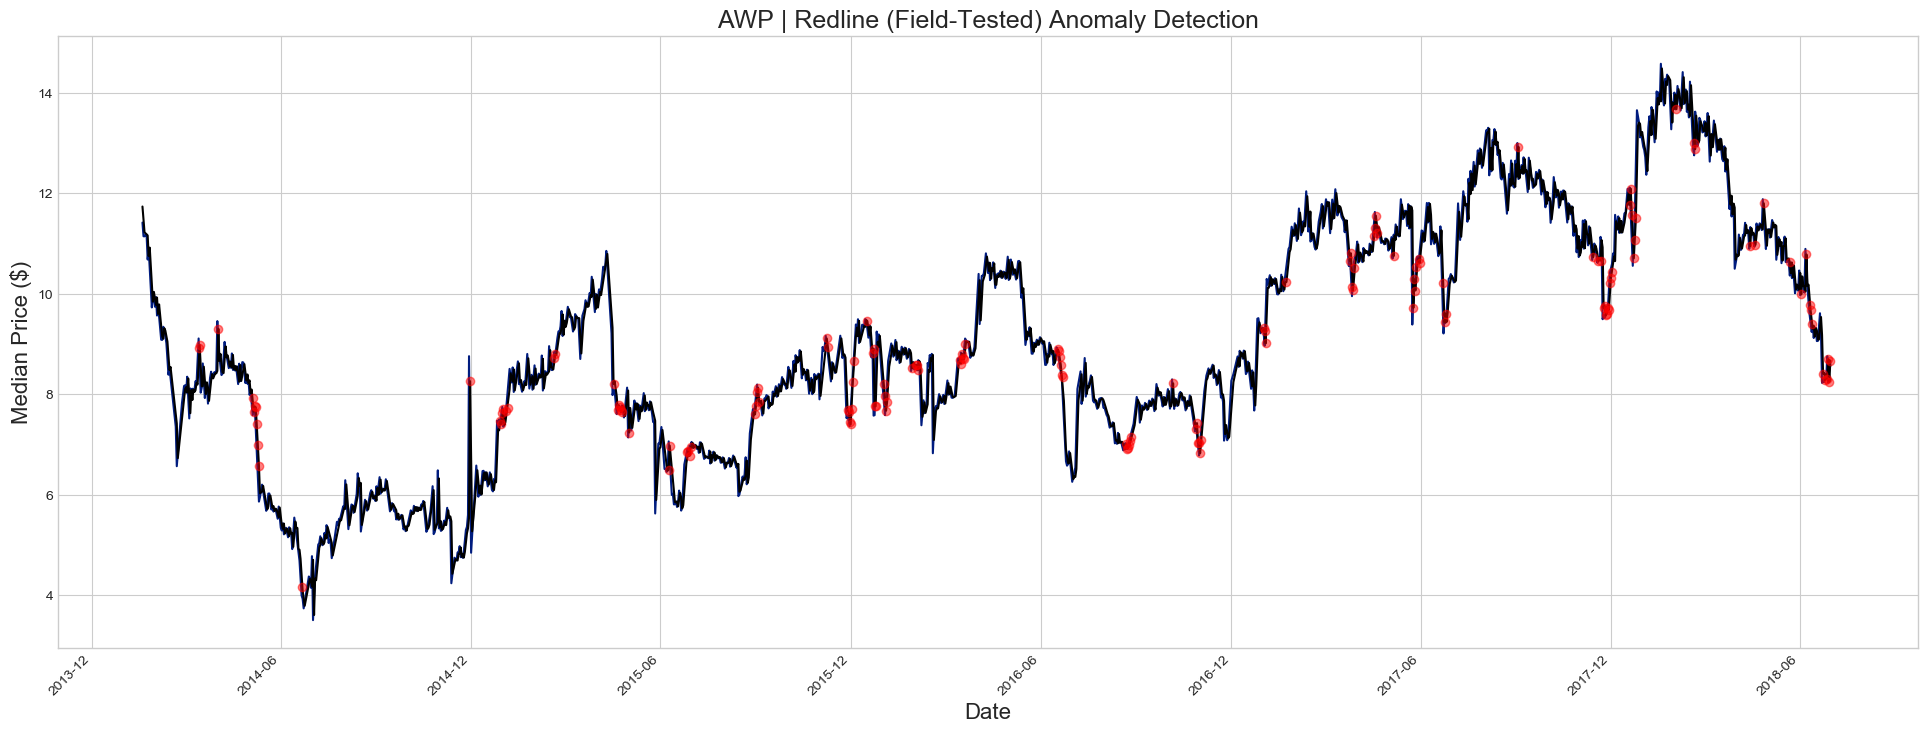

In [200]:
plt.style.use('seaborn-whitegrid')
fig, ax = plt.subplots(figsize=(24,9))
fig.autofmt_xdate(rotation=45)
ax.plot(anom_val.timestamp[31:], anom_val.median_sell_price[31:], zorder=1)
ax.plot(anom_val.timestamp[31:], model.predict_in_sample(start=1), c='black', zorder=1)
ax.scatter(results['anoms'].index, results['anoms']['anoms'], c='red', alpha=0.5, zorder=2)
ax.set_xlabel('Date', fontsize=16)
ax.set_ylabel('Median Price ($)', fontsize=16)
ax.set_title('AWP | Redline (Field-Tested) Anomaly Detection', fontsize=18)

Text(0.5,1,'AWP | Redline (Field-Tested) Anomaly Detection')

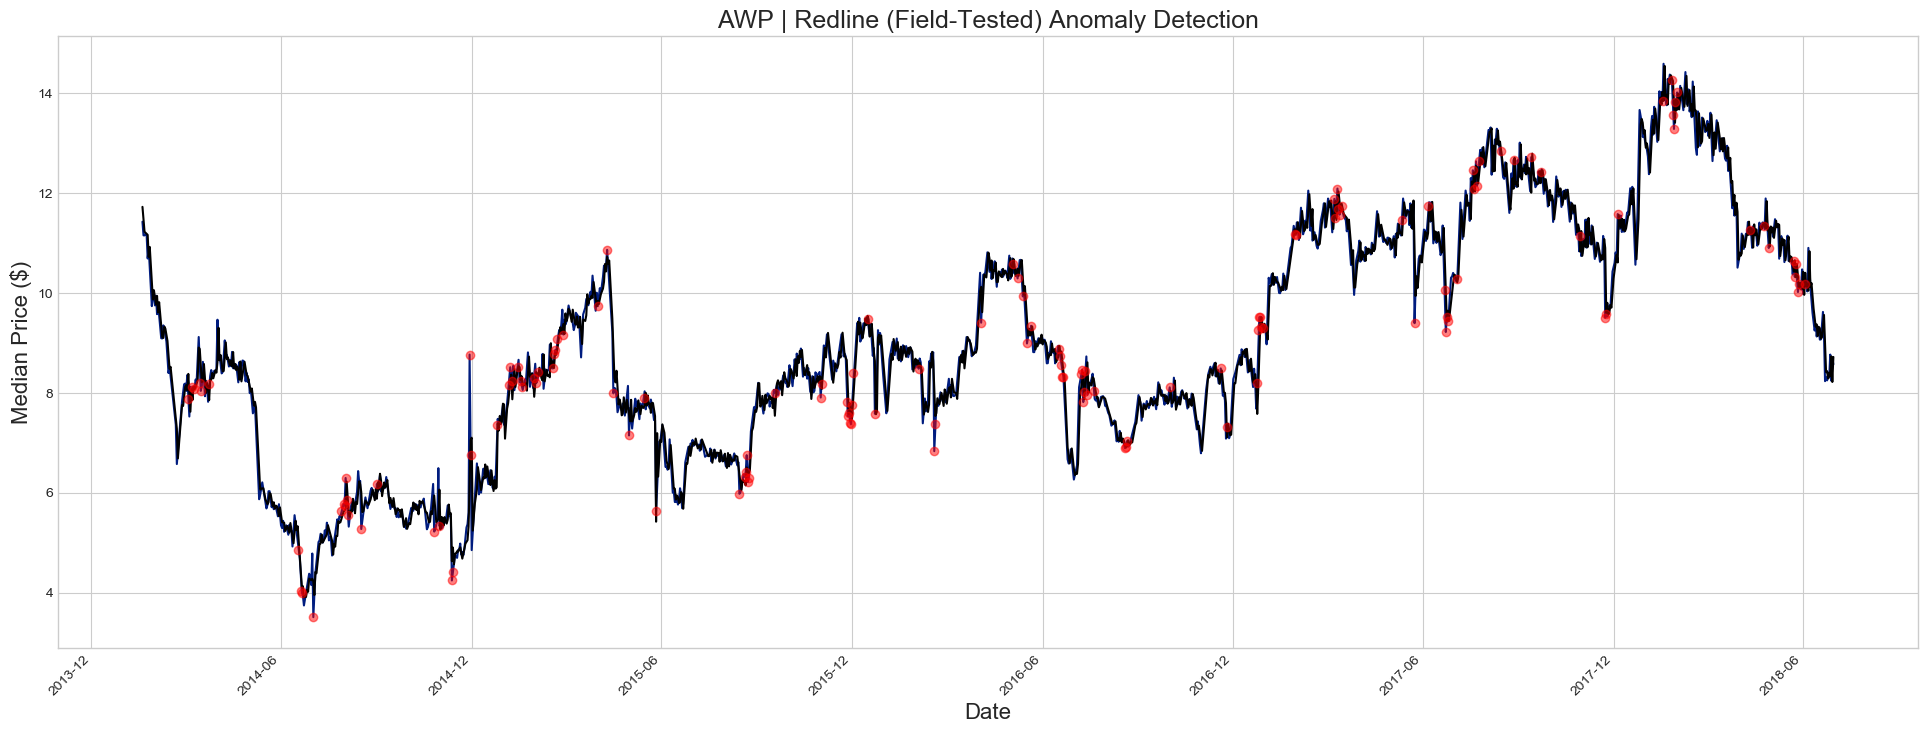

In [196]:
plt.style.use('seaborn-whitegrid')
fig, ax = plt.subplots(figsize=(24,9))
fig.autofmt_xdate(rotation=45)
ax.plot(anom_val.timestamp[31:], anom_val.median_sell_price[31:], zorder=1)
ax.plot(anom_val.timestamp[31:], model.predict_in_sample(start=1, exogenous=anom_val['quantity'][31:].values.reshape(-1,1)), c='black', zorder=1)
ax.scatter(results['anoms'].index, anom_val.median_sell_price[[t in results['anoms'].index for t in anom_val.timestamp.values]], c='red', alpha=0.5, zorder=2)
ax.set_xlabel('Date', fontsize=16)
ax.set_ylabel('Median Price ($)', fontsize=16)
ax.set_title('AWP | Redline (Field-Tested) Anomaly Detection', fontsize=18)

Text(0.5,1,'AWP | Redline (Field-Tested) Anomaly Detection')

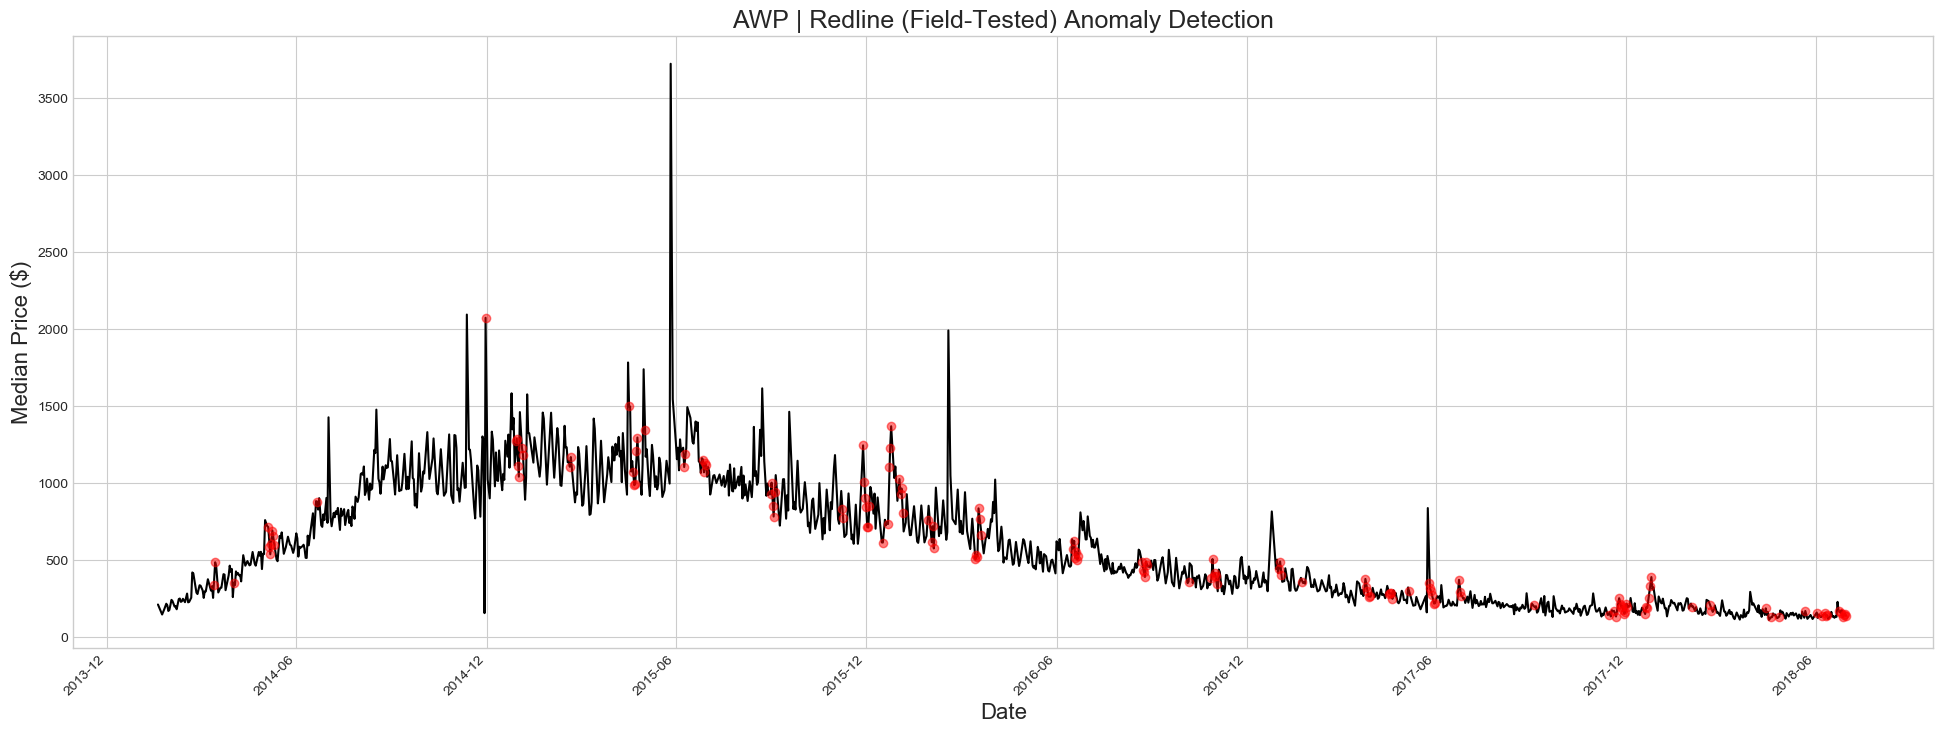

In [183]:
plt.style.use('seaborn-whitegrid')
fig, ax = plt.subplots(figsize=(24,9))
fig.autofmt_xdate(rotation=45)
# ax.plot(anom_val.timestamp[31:], anom_val.median_sell_price[31:], zorder=1)
ax.plot(anom_val.timestamp[31:], anom_val.quantity[31:], c='black', zorder=1)
ax.scatter(results['anoms'].index, anom_val.quantity[[t in results['anoms'].index for t in anom_val.timestamp.values]], c='red', alpha=0.5, zorder=2)
ax.set_xlabel('Date', fontsize=16)
ax.set_ylabel('Median Price ($)', fontsize=16)
ax.set_title('AWP | Redline (Field-Tested) Anomaly Detection', fontsize=18)

In [190]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Statespace Model Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                 1625
Model:               SARIMAX(0, 1, 2)   Log Likelihood                -285.450
Date:                Sun, 19 Aug 2018   AIC                            580.901
Time:                        11:35:02   BIC                            607.864
Sample:                             0   HQIC                           590.906
                               - 1625                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.0018      0.006     -0.318      0.750      -0.013       0.009
x1            -0.0008   2.24e-05    -33.742      0.000      -0.001      -0.001
ma.L1         -0.0920      0.022     -4.231      0.000      -0.135      -0.049
ma.L2         -0.1355      0.016     -8.368      0.000      -0.167      -0.104
sigma2         0.0832      0.002     50.512      0.000       0.080       0.086
===================================================================================
Ljung-Box (Q):                      172.13   Jarque-Bera (JB):              3945.06
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.24   Skew:                             0.01
Prob(H) (two-sided):                  0.01   Kurtosis:                        10.64
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [20]:
dfanoms = pd.DataFrame(anomalies)

NameError: name 'anomalies' is not defined

In [99]:
dfanoms[(dfanoms.loc[:,0] > pd.datetime(2016, 6, 1)) & (dfanoms.loc[:,0] < pd.datetime(2016, 7, 1))]

,0,1
114,2016-06-20,0.007038
118,2016-06-21,0.006885
133,2016-06-19,0.006475
148,2016-06-18,0.006054
175,2016-06-22,0.005439
352,2016-06-26,0.003871
353,2016-06-28,0.003867
372,2016-06-27,0.003731
373,2016-06-29,0.003729
417,2016-06-17,0.003470


### Estimated total $ traded between players from release ( ) through June 30th 2018

In [19]:
df['value'] = df['median_sell_price'] * df['quantity']

In [203]:
np.sum(df['value'])

2151645723.741001

$2,151,645,723.74

In [204]:
np.sum(df['quantity'])

1668117852

In [206]:
215164572.37/2

107582286.185

In [208]:
2151645723.74*.15

322746858.56099993

Text(0.5,1,'AWP | Redline (Field-Tested) Anomaly Detection')

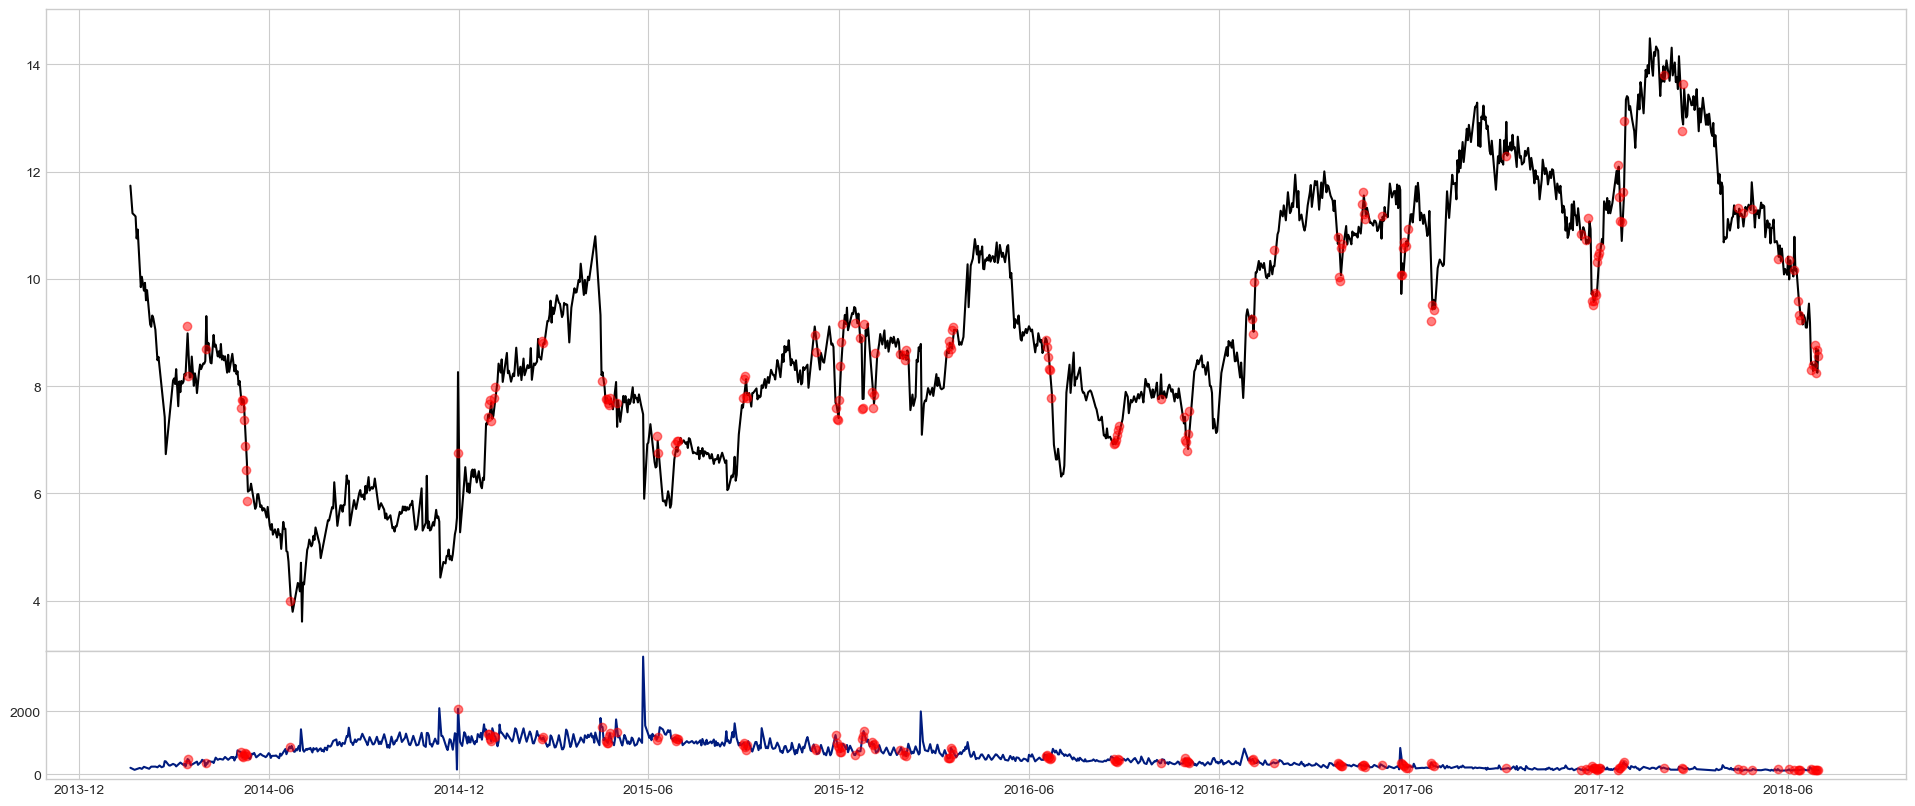

In [222]:
import matplotlib.gridspec as gridspec
plt.style.use('seaborn-whitegrid')
f = plt.figure(figsize=(24,10))

gs = gridspec.GridSpec(2, 1, height_ratios=[5,1])

ax1 = plt.subplot(gs[0])
ax2 = plt.subplot(gs[1])
f.subplots_adjust(hspace=0)
plt.setp([a.get_xticklabels() for a in f.axes[:-1]], visible=False)
fig.autofmt_xdate(rotation=45)
ax2.plot(anom_val.timestamp[31:], anom_val.quantity[31:], zorder=1)
ax2.scatter(results['anoms'].index, anom_val.quantity[[t in results['anoms'].index for t in anom_val.timestamp.values]], 
            c='red', alpha=0.5, zorder=2)
ax1.plot(anom_val.timestamp[31:], model.predict_in_sample(start=1, exogenous=anom_val['quantity'][31:].values.reshape(-1,1)), c='black', zorder=1)
ax1.scatter(results['anoms'].index, anom_val.median_sell_price[[t in results['anoms'].index for t in anom_val.timestamp.values]], 
            c='red', alpha=0.5, zorder=2)
ax.set_xlabel('Date', fontsize=16)
ax.set_ylabel('Median Price ($)', fontsize=16)
ax.set_title('AWP | Redline (Field-Tested) Anomaly Detection', fontsize=18)

In [30]:
with open('gun_anomalies.pkl', 'rb') as f:
    anoms = pickle.load(f)

In [333]:
print(*[(x.date().strftime('%d %b %Y'), '{:.3f}'.format(y)) for x, y in sorted(anoms[:14])], sep='\n')

('31 Oct 2014', '0.627')
('13 Nov 2014', '0.789')
('30 Nov 2014', '0.737')
('17 Mar 2015', '0.549')
('03 Nov 2015', '0.489')
('10 Feb 2016', '0.475')
('11 Feb 2016', '0.475')
('25 Nov 2016', '0.522')
('26 Nov 2016', '0.609')
('27 Nov 2016', '0.649')
('28 Nov 2016', '0.656')
('29 Nov 2016', '0.590')
('30 Nov 2016', '0.512')
('25 May 2017', '0.586')


In [340]:
anoms[:30]

[(Timestamp('2014-11-13 00:00:00'), 0.7894736842105263),
 (Timestamp('2014-11-30 00:00:00'), 0.7368421052631579),
 (Timestamp('2016-11-28 00:00:00'), 0.6555183946488294),
 (Timestamp('2016-11-27 00:00:00'), 0.6488294314381271),
 (Timestamp('2014-10-31 00:00:00'), 0.6268656716417911),
 (Timestamp('2016-11-26 00:00:00'), 0.6086956521739131),
 (Timestamp('2016-11-29 00:00:00'), 0.5898203592814372),
 (Timestamp('2017-05-25 00:00:00'), 0.5859375),
 (Timestamp('2015-03-17 00:00:00'), 0.5494505494505495),
 (Timestamp('2016-11-25 00:00:00'), 0.5217391304347826),
 (Timestamp('2016-11-30 00:00:00'), 0.5119760479041916),
 (Timestamp('2015-11-03 00:00:00'), 0.48936170212765956),
 (Timestamp('2016-02-10 00:00:00'), 0.4752475247524752),
 (Timestamp('2016-02-11 00:00:00'), 0.4752475247524752),
 (Timestamp('2014-11-14 00:00:00'), 0.47368421052631576),
 (Timestamp('2015-03-16 00:00:00'), 0.4725274725274725),
 (Timestamp('2016-02-09 00:00:00'), 0.47029702970297027),
 (Timestamp('2016-06-27 00:00:00'), 0

In [342]:
len(df.item_name.unique())

10758

### TwitterAD vs ARIMA + TwitterAD

In [57]:
from pyramid.arima import auto_arima
from pyculiarity import detect_ts
import datetime
plt.style.use('seaborn-whitegrid')

In [58]:
# fig, ax = plt.subplots(figsize=(24, 8), sharex=True)
# fig.autofmt_xdate(rotation=45)
anomaly_df = df[df.days_since_release > 30]
#gun = 'M4A1-S | Golden Coil (Field-Tested)'
gun = 'G3SG1 | Ventilator (Field-Tested)'
temp_df = anomaly_df[anomaly_df.item_name == gun]
temp_df['timestamp'] = [np.datetime64(datetime.datetime.fromtimestamp(t).date()) for t in temp_df.date]
temp_df = temp_df[['timestamp', 'median_sell_price']].reset_index(drop=True)
results = detect_ts(temp_df, max_anoms=0.4, alpha=0.001, direction='both', only_last=None, longterm=True, verbose=True, piecewise_median_period_weeks=2)
# ax.plot(temp_df['timestamp'], temp_df['value'], 'b')
# ax.plot(results['anoms'].index, results['anoms']['anoms'], 'ro')
# ax.set_title(gun)

/Applications/anaconda3/envs/capstone_env/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


In [59]:
aa = auto_arima(temp_df['value'], m=4)
temp_df2 = temp_df.copy()
temp_df2['value'] = aa.predict_in_sample()
results_pred = detect_ts(temp_df2.iloc[1:,:], max_anoms=0.4, alpha=0.001, direction='both', only_last=None, longterm=True, verbose=True, piecewise_median_period_weeks=3)

/Applications/anaconda3/envs/capstone_env/lib/python3.6/site-packages/pyramid/arima/auto.py:832: ModelFitWarning: Unable to fit ARIMA for order=(2, 1, 2) seasonal_order=(1, 0, 1, 4); data is likely non-stationary. (if you do not want to see these warnings, run with error_action="ignore")
  ModelFitWarning)
/Applications/anaconda3/envs/capstone_env/lib/python3.6/site-packages/statsmodels/tsa/statespace/representation.py:375: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return matrix[[slice(None)]*(matrix.ndim-1) + [0]]
/Applications/anaconda3/envs/capstone_env/lib/python3.6/site-packages/pyramid/arima/auto.py:832: ModelFitWarning: Unable to fit ARIMA for order=(1, 1, 2) seasonal_order=(0, 0, 1, 4); data is likely non-stationary. (if you do not want to see these 

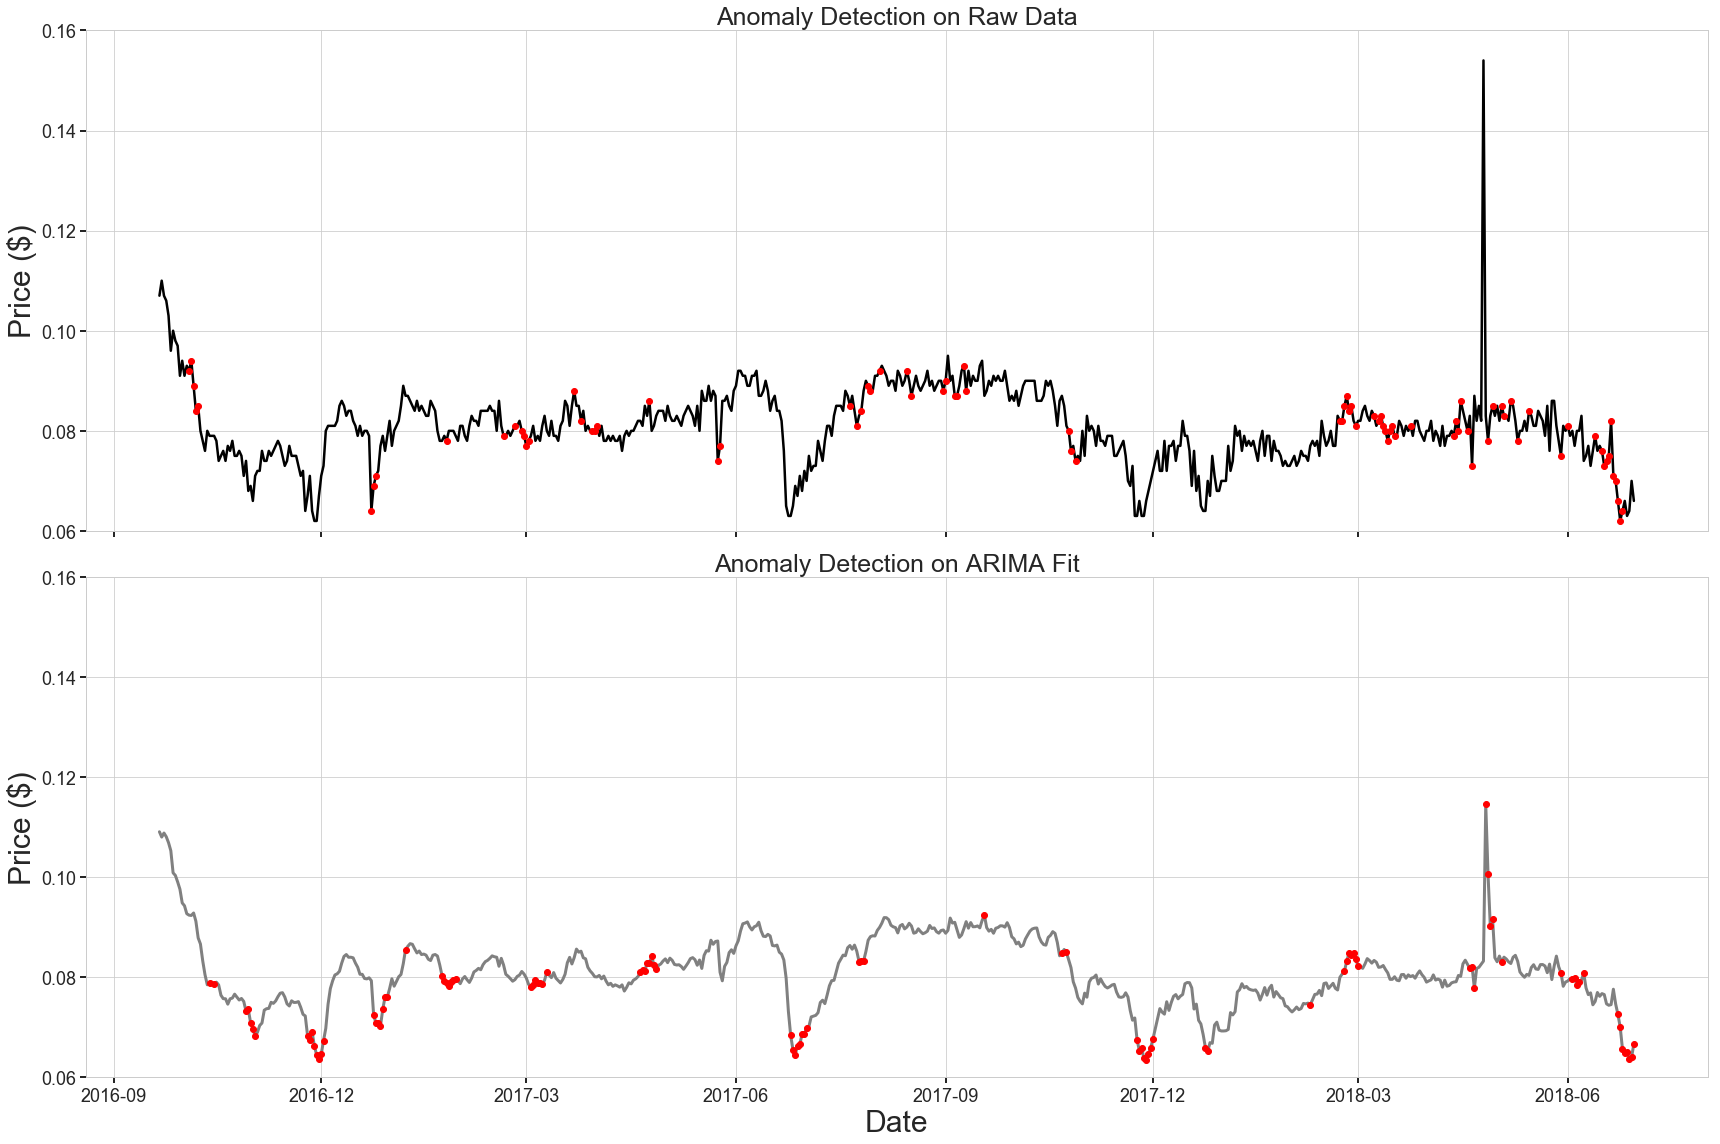

In [60]:
fig, ax = plt.subplots(2, 1, figsize=(24, 16), sharex=True)

ax[0].plot(temp_df['timestamp'][2:], temp_df['value'][2:], linewidth=2.5, c='black')
ax[0].plot(results['anoms'].index, results['anoms']['anoms'], 'ro')
ax[0].set_title('Anomaly Detection on Raw Data', fontsize=25)
ax[0].set_ylim([0.06, .16])
ax[0].set_ylabel('Price ($)', fontsize=30)
ax[0].tick_params(direction='out', length=6, width=2, labelsize=18)

ax[1].plot(temp_df['timestamp'][2:], aa.predict_in_sample(start=2), linewidth=3, c='grey')
ax[1].plot(results_pred['anoms'].index[1:], results_pred['anoms']['anoms'][1:], 'ro')
ax[1].set_title('Anomaly Detection on ARIMA Fit', fontsize=25)
ax[1].set_xlabel('Date', fontsize=30)
ax[1].set_ylim([0.06, .16])
ax[1].set_ylabel('Price ($)', fontsize=30)
ax[1].tick_params(direction='out', length=6, width=2, labelsize=18)
plt.tight_layout()
plt.gcf()
plt.savefig('arima_vs_raw.png', dpi=400, pad_inches=0)

### Plot and label anomalies

In [49]:
anom_timestamps = [x for x, y in anoms[:30]]

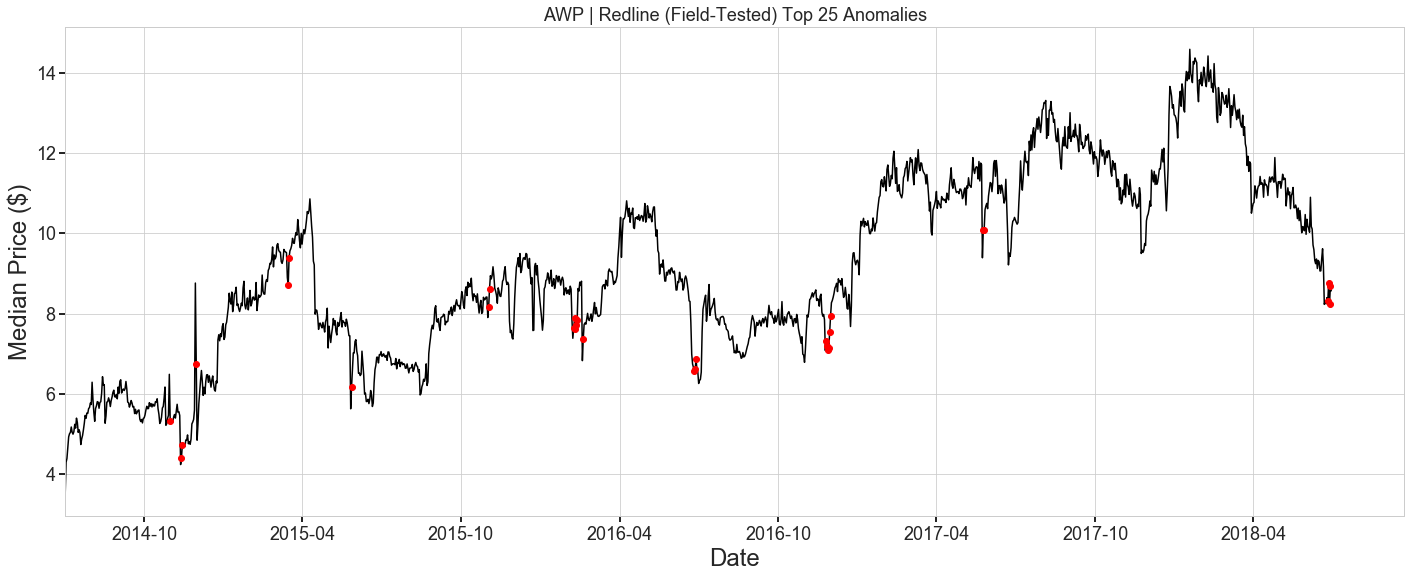

In [104]:
plt.style.use('seaborn-whitegrid')
fig, ax = plt.subplots(figsize=(24,9))
ax.plot(anom_val.timestamp[31:], anom_val.median_sell_price[31:], c='black', zorder=1)
ax.scatter(sorted(anom_timestamps), anom_val[[x in anom_timestamps for x in anom_val['timestamp']]]['median_sell_price'], c='red', zorder=2)
ax.set_xlabel('Date', fontsize=24)
ax.set_ylabel('Median Price ($)', fontsize=24)
ax.set_title('AWP | Redline (Field-Tested) Top 25 Anomalies', fontsize=18)
ax.set_xlim(left=pd.Timestamp('2014-07-02'))
ax.tick_params(direction='out', length=6, width=2, labelsize=18)
plt.gcf()
plt.savefig('label_anoms.png', dpi=400, pad_inches=0)

In [105]:
sorted(anom_timestamps)

[Timestamp('2014-10-31 00:00:00'),
 Timestamp('2014-11-13 00:00:00'),
 Timestamp('2014-11-14 00:00:00'),
 Timestamp('2014-11-30 00:00:00'),
 Timestamp('2015-03-16 00:00:00'),
 Timestamp('2015-03-17 00:00:00'),
 Timestamp('2015-05-28 00:00:00'),
 Timestamp('2015-11-02 00:00:00'),
 Timestamp('2015-11-03 00:00:00'),
 Timestamp('2016-02-08 00:00:00'),
 Timestamp('2016-02-09 00:00:00'),
 Timestamp('2016-02-10 00:00:00'),
 Timestamp('2016-02-11 00:00:00'),
 Timestamp('2016-02-12 00:00:00'),
 Timestamp('2016-02-19 00:00:00'),
 Timestamp('2016-06-26 00:00:00'),
 Timestamp('2016-06-27 00:00:00'),
 Timestamp('2016-06-28 00:00:00'),
 Timestamp('2016-11-25 00:00:00'),
 Timestamp('2016-11-26 00:00:00'),
 Timestamp('2016-11-27 00:00:00'),
 Timestamp('2016-11-28 00:00:00'),
 Timestamp('2016-11-29 00:00:00'),
 Timestamp('2016-11-30 00:00:00'),
 Timestamp('2017-05-25 00:00:00'),
 Timestamp('2017-05-26 00:00:00'),
 Timestamp('2018-06-26 00:00:00'),
 Timestamp('2018-06-27 00:00:00'),
 Timestamp('2018-06-